In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
pip install matplotlib-label-lines
from labellines import *

In [5]:
covid = pd.read_csv("/Users/SianMcDonald/Documents/Data Academy/covid.csv")
gdp = pd.read_csv("//Users/SianMcDonald/Documents/Data Academy/gdp.csv")
tourism = pd.read_csv("//Users/SianMcDonald/Documents/Data Academy/tourism.csv")
pop_65 = pd.read_csv("//Users/SianMcDonald/Documents/Data Academy/pop_65.csv")
pop_desn = pd.read_csv("//Users/SianMcDonald/Documents/Data Academy/pop_dens.csv")
beds = pd.read_csv("//Users/SianMcDonald/Documents/Data Academy/beds.csv")

In [12]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,country_code,country_name
0,4/21/2020,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia,AFG,Afghanistan
1,4/20/2020,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia,AFG,Afghanistan
2,4/19/2020,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia,AFG,Afghanistan
3,4/18/2020,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia,AFG,Afghanistan
4,4/17/2020,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0,Asia,AFG,Afghanistan


In [7]:
covid['country_code'] = covid['countryterritoryCode']
covid['country_name'] = covid['countriesAndTerritories']
covid2 = covid.drop(["countryterritoryCode","countriesAndTerritories","geoId"],axis = 1)
covid2.head()

,dateRep,day,month,year,cases,deaths,popData2018,continentExp,country_code,country_name
0,4/21/2020,21,4,2020,35,2,37172386.0,Asia,AFG,Afghanistan
1,4/20/2020,20,4,2020,88,3,37172386.0,Asia,AFG,Afghanistan
2,4/19/2020,19,4,2020,63,0,37172386.0,Asia,AFG,Afghanistan
3,4/18/2020,18,4,2020,51,1,37172386.0,Asia,AFG,Afghanistan
4,4/17/2020,17,4,2020,10,4,37172386.0,Asia,AFG,Afghanistan


In [8]:
#Merging all the data together (left joins on country code and name for most as come from same source)
merged_data = covid2.merge(tourism, on='country_code', how='left')
merged_data.rename(columns={'country_name_y': 'country_name'}, inplace = True)
merged_data = merged_data.merge(gdp, on=['country_code','country_name'], how='left')
merged_data = merged_data.merge(pop_65, on=['country_code','country_name'], how = 'left')
merged_data = merged_data.merge(pop_desn, on=['country_code','country_name'], how = 'left' )
merged_data = merged_data.merge(beds, on=['country_code','country_name'], how = 'left')

In [9]:
merged_data.head()

,dateRep,day,month,year,cases,deaths,popData2018,continentExp,country_code,country_name_x,country_name,tourism,gdp,pop_65,pop_dens,beds
0,4/21/2020,21,4,2020,35,2,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
1,4/20/2020,20,4,2020,88,3,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
2,4/19/2020,19,4,2020,63,0,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
3,4/18/2020,18,4,2020,51,1,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
4,4/17/2020,17,4,2020,10,4,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5


In [55]:
def plot_cases(df, country_code):
    data = df[df['country_code'] == country_code]
    data['dateRep'] = pd.to_datetime(data['dateRep'])
    date = data['dateRep']
    cases = data['cases']
    deaths = data['deaths']
    plt.plot(date, cases, '.', color = 'green');
    plt.plot(date, deaths, '.', color = 'red')
    plt.title("Number of Covid19 Cases and Deaths in " + country_code)
    plt.xticks(rotation=90)
    plt.legend(['Cases', 'Deaths'])

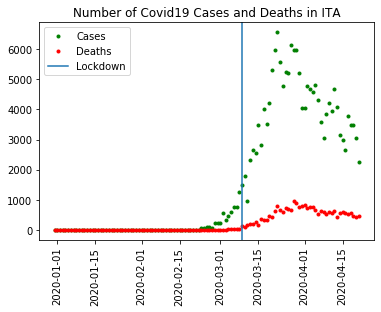

In [64]:
plot_cases(merged_data, 'ITA')
plt.axvline(dt.datetime(2020, 3, 9))
plt.legend(['Cases', 'Deaths','Lockdown']);

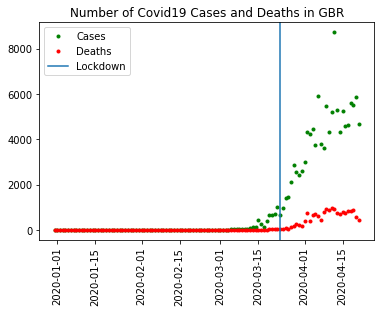

In [63]:
plot_cases(merged_data, 'GBR')
plt.axvline(dt.datetime(2020, 3, 23))
plt.legend(['Cases', 'Deaths','Lockdown']);

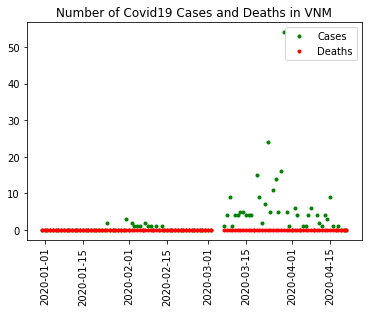

In [68]:
plot_cases(merged_data, 'VNM')

In [70]:
merged_data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths', 'popData2018',
       'continentExp', 'country_code', 'country_name_x', 'country_name',
       'tourism', 'gdp', 'pop_65', 'pop_dens', 'beds'],
      dtype='object')

In [225]:
agg_data = pd.DataFrame(merged_data.groupby(['country_code'],sort=True)['country_code','country_name','popData2018','tourism','gdp','pop_65','pop_dens','beds'].max())
agg_data.head()

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds
country_code,,,,,,,,
ABW,ABW,Aruba,105845.0,1082000.0,25630.266490,14343.0,588.027778,NaN
AFG,AFG,Afghanistan,37172386.0,NaN,520.896603,960879.0,56.937760,0.5
AGO,AGO,Angola,30809762.0,218000.0,3432.385736,682859.0,24.713052,NaN
ALB,ALB,Albania,2866376.0,5340000.0,5268.848504,393976.0,104.612263,2.9
AND,AND,Andorra,77006.0,3042000.0,42029.762740,NaN,163.842553,NaN


In [226]:
sum_cases = pd.DataFrame(merged_data.groupby(['country_code'])['cases'].sum())
sum_deaths = pd.DataFrame(merged_data.groupby(['country_code'])['deaths'].sum())

In [264]:
#This does the join on the index which here is country code
agg_data2 = agg_data.merge(sum_cases, left_index = True, right_index = True, how='left')
agg_data2 = agg_data2.merge(sum_deaths, left_index = True, right_index = True, how='left')

ValueError: cannot insert country_code, already exists

In [267]:
agg_data2

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,cases
country_code,,,,,,,,,
ABW,ABW,Aruba,105845.0,1082000.0,25630.266490,14343.0,588.027778,NaN,97
AFG,AFG,Afghanistan,37172386.0,NaN,520.896603,960879.0,56.937760,0.5,1031
AGO,AGO,Angola,30809762.0,218000.0,3432.385736,682859.0,24.713052,NaN,24
ALB,ALB,Albania,2866376.0,5340000.0,5268.848504,393976.0,104.612263,2.9,584
AND,AND,Andorra,77006.0,3042000.0,42029.762740,NaN,163.842553,NaN,717
...,...,...,...,...,...,...,...,...,...
XKX,XKX,Kosovo,1845300.0,NaN,4302.276483,NaN,168.154680,NaN,598
YEM,YEM,"Yemen, Rep.",28498687.0,NaN,944.408499,819699.0,53.977853,0.7,1
ZAF,ZAF,South Africa,57779622.0,10472000.0,6374.028196,3072723.0,47.630120,NaN,3300


In [229]:
#Rename the column names to be sum of cases and deaths
agg_data2.rename(columns={'cases': 'sum_cases','deaths': 'sum_deaths'},inplace = True)
#Add a column of the death rates
agg_data2['death_rate'] = agg_data2['sum_deaths']/agg_data2['sum_cases']
#Add a column for percentage of population over 65
agg_data2['perc_65_plus'] = agg_data2['pop_65']/agg_data2['popData2018']

In [230]:
agg_data2.shape

(202, 12)

In [231]:
agg_data2.describe()

,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
count,2.010000e+02,1.780000e+02,187.000000,1.790000e+02,194.000000,125.000000,202.000000,202.000000,202.000000,179.000000
mean,3.750281e+07,7.651614e+06,18381.888688,3.717484e+06,333.482021,3.420800,12035.519802,840.851485,0.039444,0.090603
std,1.417059e+08,1.456192e+07,26799.780498,1.391065e+07,1514.541442,2.604936,61007.746642,4176.727489,0.041722,0.063787
min,1.000000e+03,1.400000e+04,271.752044,6.174000e+03,0.136497,0.300000,1.000000,0.000000,0.000000,0.010850
25%,1.308974e+06,4.510000e+05,2351.212688,1.441730e+05,37.370577,1.500000,64.250000,1.000000,0.008190,0.033676
50%,7.061507e+06,1.955000e+06,7246.731656,5.823960e+05,91.177915,2.800000,446.500000,9.000000,0.027456,0.070129
75%,2.626237e+07,8.084250e+06,23373.435025,2.081209e+06,218.004208,4.600000,3236.500000,80.250000,0.052498,0.147170
max,1.392730e+09,8.932200e+07,185741.280000,1.520984e+08,19196.000000,13.800000,787752.000000,42539.000000,0.200000,0.275764


In [232]:
agg_data2.head()

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
ABW,ABW,Aruba,105845.0,1082000.0,25630.266490,14343.0,588.027778,NaN,97,2,0.020619,0.135509
AFG,AFG,Afghanistan,37172386.0,NaN,520.896603,960879.0,56.937760,0.5,1031,35,0.033948,0.025849
AGO,AGO,Angola,30809762.0,218000.0,3432.385736,682859.0,24.713052,NaN,24,2,0.083333,0.022164
ALB,ALB,Albania,2866376.0,5340000.0,5268.848504,393976.0,104.612263,2.9,584,26,0.044521,0.137447
AND,AND,Andorra,77006.0,3042000.0,42029.762740,NaN,163.842553,NaN,717,36,0.050209,NaN


# What are the corralations between the variables and which are most corralated with the number of cases/deaths?

In [233]:
agg_data2.corr()

,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
popData2018,1.000000,0.370666,-0.072435,0.937351,-0.019623,0.004401,0.232268,0.185924,0.041236,-0.008909
tourism,0.370666,1.000000,0.172461,0.515919,-0.031035,0.184626,0.661112,0.759044,0.221566,0.413695
gdp,-0.072435,0.172461,1.000000,0.046628,0.478761,0.380610,0.174719,0.180053,-0.003147,0.571697
pop_65,0.937351,0.515919,0.046628,1.000000,-0.003335,0.145832,0.378304,0.326905,0.077340,0.130430
pop_dens,-0.019623,-0.031035,0.478761,-0.003335,1.000000,0.319339,-0.025241,-0.026065,-0.038826,0.041226
beds,0.004401,0.184626,0.380610,0.145832,0.319339,1.000000,0.033523,0.030745,-0.091326,0.671054
sum_cases,0.232268,0.661112,0.174719,0.378304,-0.025241,0.033523,1.000000,0.913302,0.144557,0.228028
sum_deaths,0.185924,0.759044,0.180053,0.326905,-0.026065,0.030745,0.913302,1.000000,0.280504,0.284657
death_rate,0.041236,0.221566,-0.003147,0.077340,-0.038826,-0.091326,0.144557,0.280504,1.000000,0.130828
perc_65_plus,-0.008909,0.413695,0.571697,0.130430,0.041226,0.671054,0.228028,0.284657,0.130828,1.000000


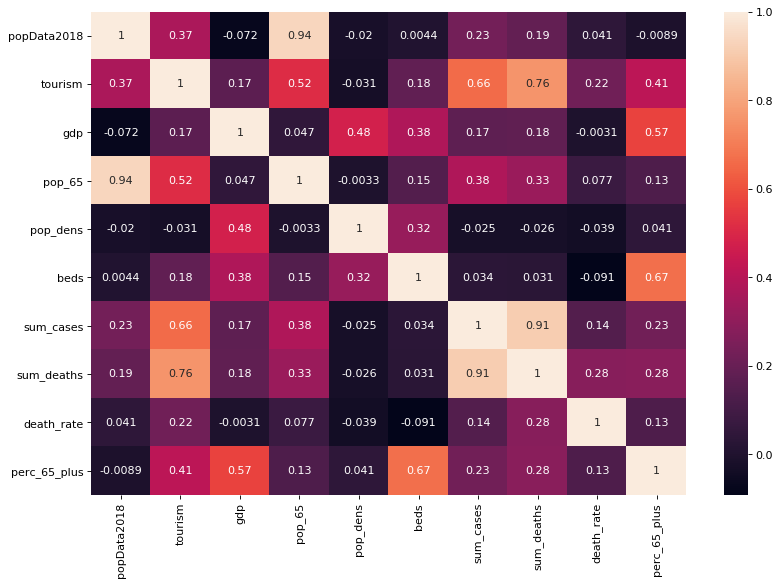

In [234]:
Var_Corr = agg_data2.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True);

## We see that tourism is the most positively corralated with the number of cases which makes sense, as the more people visiting a country, the easy the virus will spread.

# Questions

2. Plot tourism against cases
3. Decide on which questions we are asking and answering
4. What is the death rate of countries
5. how to draw line from day 1 with 100 deatsh
4. try and make a graph of all countries on 1 graph
5. Can we fit a model to Italy
6. Can we use this to predict cases in the UK?

In [235]:
agg_data2[agg_data2['sum_cases'] > 700000]

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
USA,USA,United States,327167434.0,79745920.0,62794.58565,51641630.0,35.766089,2.9,787752,42539,0.054,0.157845


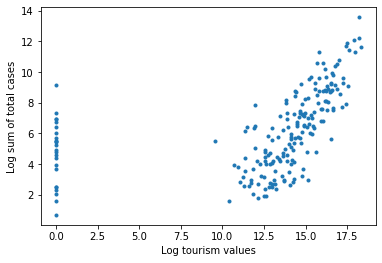

In [236]:
#There are only 24 null values so we will fill them with 0
x = agg_data2['tourism'].fillna(0)
y = agg_data2['sum_cases']
#We are logging the data as without it the data is skewed as some countries cases have grown exponentially (e.g. USA with 780k cases)
plt.plot(np.log(x +1),np.log(y+1),'.')
plt.xlabel("Log tourism values")
plt.ylabel("Log sum of total cases");
#plt.boxplot(y)

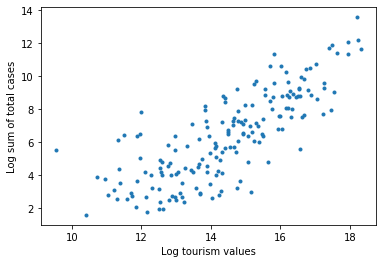

In [237]:
#If we drop the values with null tourism we should have a better plot
agg_data3 = agg_data2.dropna(subset=['tourism'])
x = agg_data3['tourism']
y = agg_data3['sum_cases']
plt.plot(np.log(x +1),np.log(y+1),'.')
plt.xlabel("Log tourism values")
plt.ylabel("Log sum of total cases");
#plt.boxplot(y)

Removing null values, and logging both variables we see a strong positive corralation between tourism numbers and the total cases a coutnry has. This tourism number is ....
This is expected as the most visitors a country has the most likely they will be to aide the spread of the virus

# Which top 5 countries have the most infections?

In [238]:
top5_cases = agg_data2.sort_values('sum_cases',ascending=False).head()
top5_cases

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
USA,USA,United States,327167434.0,79745920.0,62794.58565,51641630.0,35.766089,2.9,787752,42539,0.054000,0.157845
ESP,ESP,Spain,46723749.0,82773000.0,30370.89233,9068471.0,93.529058,3.0,200210,20852,0.104151,0.194087
ITA,ITA,Italy,60431283.0,61567200.0,34483.20400,13746965.0,205.450748,3.4,181228,24114,0.133059,0.227481
DEU,DEU,Germany,82927922.0,38881000.0,47603.02763,17793207.0,237.370970,8.3,143457,4598,0.032051,0.214562
GBR,GBR,United Kingdom,66488991.0,36316000.0,42943.90227,12225956.0,274.827392,2.8,124743,16509,0.132344,0.183879


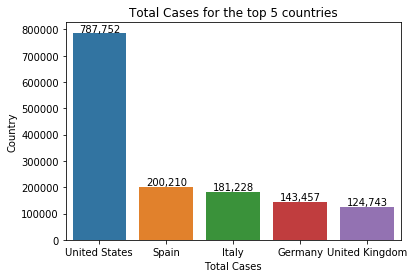

In [239]:
sns.barplot(top5_cases['country_name'], top5_cases['sum_cases'])
plt.title('Total Cases for the top 5 countries')
plt.xlabel('Total Cases')
plt.ylabel('Country')

# Add labels to the plot
plt.text(-0.3,791000,'787,752')
plt.text(0.7,206000,'200,210')
plt.text(1.7,190000,'181,228')
plt.text(2.7,150000,'143,457')
plt.text(3.7,130000,'124,743');

The USA, Spain, Italy, Germany and the UK currently have the highest number of total cases.

# Which countries have the top 5 deaths?

In [240]:
top5_deaths = agg_data2.sort_values('sum_deaths',ascending=False).head()
top5_deaths

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
USA,USA,United States,327167434.0,79745920.0,62794.58565,51641630.0,35.766089,2.9,787752,42539,0.054000,0.157845
ITA,ITA,Italy,60431283.0,61567200.0,34483.20400,13746965.0,205.450748,3.4,181228,24114,0.133059,0.227481
ESP,ESP,Spain,46723749.0,82773000.0,30370.89233,9068471.0,93.529058,3.0,200210,20852,0.104151,0.194087
FRA,FRA,France,66987244.0,89322000.0,41463.64402,13418612.0,122.338396,6.5,114657,20265,0.176745,0.200316
GBR,GBR,United Kingdom,66488991.0,36316000.0,42943.90227,12225956.0,274.827392,2.8,124743,16509,0.132344,0.183879


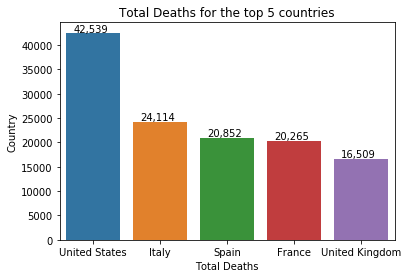

In [241]:
sns.barplot(top5_deaths['country_name'], top5_deaths['sum_deaths'])
plt.title('Total Deaths for the top 5 countries')
plt.xlabel('Total Deaths')
plt.ylabel('Country')

# Add labels to the plot
plt.text(-0.3,42700,'42,539')
plt.text(0.7,24500,'24,114')
plt.text(1.7,21200,'20,852')
plt.text(2.7,20700,'20,265')
plt.text(3.7,17000,'16,509');

France is now in the top 5 but USA, Italy and Spain keep the lead with the highest number of deaths

# Which 5 countries have the highest death rate

In [242]:
top5_death_rates = agg_data2.sort_values('death_rate',ascending=False).head()
top5_death_rates

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
VGB,VGB,British Virgin Islands,29802.0,192000.0,NaN,NaN,198.680000,NaN,5,1,0.200000,NaN
FRA,FRA,France,66987244.0,89322000.0,41463.644020,13418612.0,122.338396,6.5,114657,20265,0.176745,0.200316
BDI,BDI,Burundi,11175378.0,299000.0,271.752044,251104.0,435.178271,0.8,6,1,0.166667,0.022469
NIC,NIC,Nicaragua,6465513.0,1256000.0,2028.894755,339278.0,53.727048,0.9,13,2,0.153846,0.052475
SXM,SXM,Sint Maarten (Dutch part),41486.0,178000.0,NaN,NaN,1193.352941,NaN,68,10,0.147059,NaN


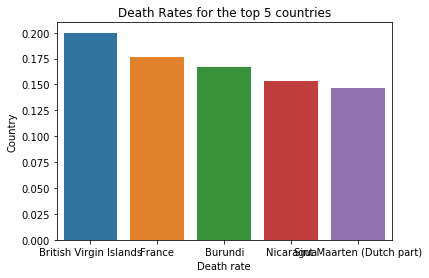

In [243]:
sns.barplot(top5_death_rates['country_name'], top5_death_rates['death_rate'])
plt.title('Death Rates for the top 5 countries')
plt.xlabel('Death rate')
plt.ylabel('Country');

The country with the highest death rate at the moment is the British Virgin Islands, this because they have 5 cases and 1 death. If we look at countries with over 10,000 deaths what do we get instead?

In [244]:
data3 = agg_data2[agg_data2['sum_deaths']>10000]
top5_death_rates_v2 = data3.sort_values('death_rate',ascending=False).head()
top5_death_rates_v2

,country_code,country_name,popData2018,tourism,gdp,pop_65,pop_dens,beds,sum_cases,sum_deaths,death_rate,perc_65_plus
country_code,,,,,,,,,,,,
FRA,FRA,France,66987244.0,89322000.0,41463.64402,13418612.0,122.338396,6.5,114657,20265,0.176745,0.200316
ITA,ITA,Italy,60431283.0,61567200.0,34483.20400,13746965.0,205.450748,3.4,181228,24114,0.133059,0.227481
GBR,GBR,United Kingdom,66488991.0,36316000.0,42943.90227,12225956.0,274.827392,2.8,124743,16509,0.132344,0.183879
ESP,ESP,Spain,46723749.0,82773000.0,30370.89233,9068471.0,93.529058,3.0,200210,20852,0.104151,0.194087
USA,USA,United States,327167434.0,79745920.0,62794.58565,51641630.0,35.766089,2.9,787752,42539,0.054000,0.157845


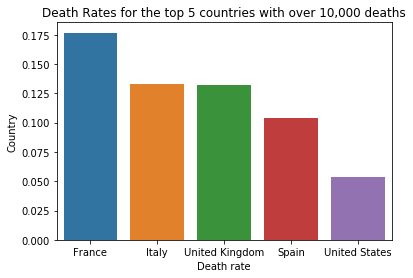

In [248]:
sns.barplot(top5_death_rates_v2['country_name'], top5_death_rates_v2['death_rate'])
plt.title('Death Rates for the top 5 countries with over 10,000 deaths')
plt.xlabel('Death rate')
plt.ylabel('Country');

**Ask Saad how to make the colours of this dependent on another variable

We see that France has the highest death rate followed by Italy, with the US coming in last.
Interestingly, France, out of these 5 has the highest number of beds per 1000 people (6.5) and USA has the least (2.9) suggesting a negative corralation between these variables which doesn't really make sense. It could be that more bed imply a more advance medical system and hence they are doing more testing.

The testing data is not very clear from what I have found, with different countries using different measures leading to inconsistent results so I will not bring it in to my data set. From the data found here:https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing.xlsx
Italy and Spain have the highest levels of cumulative tests performed per 1000 people (24 and 20 respectively) and the UK is much further behind with 8. France and the US have unclear units so we can not really compare them.

France and Italy have similar percentages of 65+ people in their population so this could elevate their death rate, and the UK's lack of testing will elevate it's death rate comparitively.

# How are we doing against the virus? Are we flattening the curve?
## Make the cool cumulative graph

In [274]:
merged_data.head()
merged_data['dateRep'] = pd.to_datetime(merged_data['dateRep'])

,dateRep,day,month,year,cases,deaths,popData2018,continentExp,country_code,country_name_x,country_name,tourism,gdp,pop_65,pop_dens,beds
0,2020-04-21,21,4,2020,35,2,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
1,2020-04-20,20,4,2020,88,3,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
2,2020-04-19,19,4,2020,63,0,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
3,2020-04-18,18,4,2020,51,1,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
4,2020-04-17,17,4,2020,10,4,37172386.0,Asia,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5


In [275]:
subset = merged_data[['dateRep','cases','deaths', 'country_code']]

In [284]:
cum_data = subset.groupby(['country_code', 'dateRep']).sum().groupby(level=0).cumsum().reset_index()
cum_data.rename(columns = {'cases': 'cum_cases','deaths': 'cum_deaths'}, inplace = True)
cum_data.head()

,country_code,dateRep,cum_cases,cum_deaths
0,ABW,2020-03-13,2,0
1,ABW,2020-03-20,4,0
2,ABW,2020-03-24,12,0
3,ABW,2020-03-25,17,0
4,ABW,2020-03-26,19,0


In [287]:
cum_data[cum_data['country_code'] =='GBR']

,country_code,dateRep,cum_cases,cum_deaths
4094,GBR,2019-12-31,0,0
4095,GBR,2020-01-01,0,0
4096,GBR,2020-01-02,0,0
4097,GBR,2020-01-03,0,0
4098,GBR,2020-01-04,0,0
...,...,...,...,...
4202,GBR,2020-04-17,103093,13729
4203,GBR,2020-04-18,108692,14576
4204,GBR,2020-04-19,114217,15464
4205,GBR,2020-04-20,120067,16060


In [337]:
# Get data where number of deaths > 100
gt_100_dt = cum_data[cum_data['cum_deaths']>100]

,country_code,dateRep,cum_cases,cum_deaths
393,ARG,2020-04-15,2432,105
394,ARG,2020-04-16,2432,109
395,ARG,2020-04-17,2560,115
396,ARG,2020-04-18,2658,122
397,ARG,2020-04-19,2828,132
...,...,...,...,...
11588,USA,2020-04-17,671331,33284
11589,USA,2020-04-18,702164,37054
11590,USA,2020-04-19,735086,38910
11591,USA,2020-04-20,759687,40682


In [382]:
#Create an empty data set to append to
final_data = pd.DataFrame(columns=['country_code', 'dateRep', 'cum_cases','cum_deaths','days_since_100'])

for i in pd.DataFrame(gt_100_dt.groupby(['country_code'])['country_code'])[0]:
    dataset = gt_100_dt[gt_100_dt['country_code'] == i]
    start_date = dataset.iloc[0]['dateRep']
    dataset['days_since_100'] = dataset['dateRep'] - start_date
    final_data = final_data.append(dataset)

In [383]:
final_data

,country_code,dateRep,cum_cases,cum_deaths,days_since_100
393,ARG,2020-04-15,2432,105,0 days
394,ARG,2020-04-16,2432,109,1 days
395,ARG,2020-04-17,2560,115,2 days
396,ARG,2020-04-18,2658,122,3 days
397,ARG,2020-04-19,2828,132,4 days
...,...,...,...,...,...
11588,USA,2020-04-17,671331,33284,30 days
11589,USA,2020-04-18,702164,37054,31 days
11590,USA,2020-04-19,735086,38910,32 days
11591,USA,2020-04-20,759687,40682,33 days


In [384]:
final_data.dtypes

country_code               object
dateRep            datetime64[ns]
cum_cases                  object
cum_deaths                 object
days_since_100    timedelta64[ns]
dtype: object

In [385]:
final_data['cum_cases'] = final_data['cum_cases'].astype(float)
final_data['cum_deaths'] = final_data['cum_deaths'].astype(float)

In [391]:
final_data['country_code'].unique()

array(['ARG', 'AUT', 'BEL', 'BGD', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP',
       'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR',
       'ITA', 'JPN', 'KOR', 'MAR', 'MEX', 'NLD', 'NOR', 'PAK', 'PAN',
       'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SRB', 'SWE',
       'TUR', 'UKR', 'USA'], dtype=object)

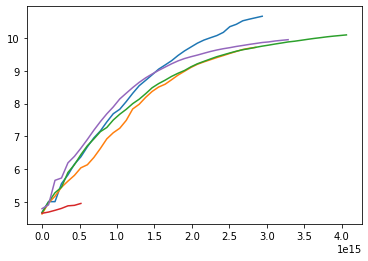

In [386]:
x = final_data[final_data['country_code'] == 'USA']['days_since_100']
y = final_data[final_data['country_code'] == 'USA']['cum_deaths']

plt.plot(x,np.log(y+1))
plt.plot(final_data[final_data['country_code'] == 'GBR']['days_since_100'], np.log(final_data[final_data['country_code'] == 'GBR']['cum_deaths'] +1))
plt.plot(final_data[final_data['country_code'] == 'ITA']['days_since_100'], np.log(final_data[final_data['country_code'] == 'ITA']['cum_deaths'] +1))
plt.plot(final_data[final_data['country_code'] == 'ARG']['days_since_100'], np.log(final_data[final_data['country_code'] == 'ARG']['cum_deaths'] +1))
plt.plot(final_data[final_data['country_code'] == 'ESP']['days_since_100'], np.log(final_data[final_data['country_code'] == 'ESP']['cum_deaths'] +1))

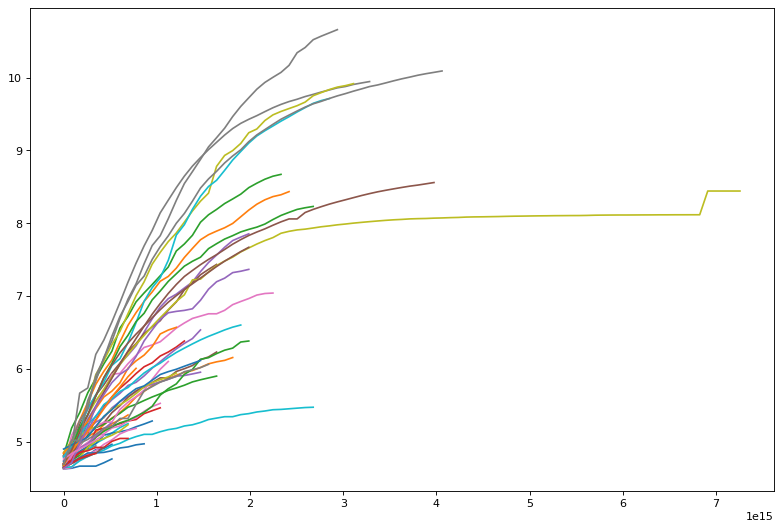

In [405]:
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
for i in pd.DataFrame(gt_100_dt.groupby(['country_code'])['country_code'])[0]:
    x = final_data[final_data['country_code'] == i]['days_since_100']
    y = final_data[final_data['country_code'] == i]['cum_deaths']
    plt.plot(x,np.log(y+1))

In [396]:
pd.DataFrame(gt_100_dt.groupby(['country_code'])['country_code'])[0]

0     ARG
1     AUT
2     BEL
3     BGD
4     BRA
5     CAN
6     CHE
7     CHL
8     CHN
9     COL
10    CZE
11    DEU
12    DNK
13    DOM
14    DZA
15    ECU
16    EGY
17    ESP
18    FRA
19    GBR
20    GRC
21    HUN
22    IDN
23    IND
24    IRL
25    IRN
26    ISR
27    ITA
28    JPN
29    KOR
30    MAR
31    MEX
32    NLD
33    NOR
34    PAK
35    PAN
36    PER
37    PHL
38    POL
39    PRT
40    ROU
41    RUS
42    SAU
43    SRB
44    SWE
45    TUR
46    UKR
47    USA
Name: 0, dtype: object

In [423]:
#Limit the data at 50 days as this cuts off the long bit that China has
final_data2 = final_data[final_data['days_since_100'] < '50 days']

In [424]:
subset_countries = ['CHN','DEU','ESP','FRA','GBR','IND','ITA','JPN','KOR','USA']
subset_countries

['CHN', 'DEU', 'ESP', 'FRA', 'GBR', 'IND', 'ITA', 'JPN', 'KOR', 'USA']

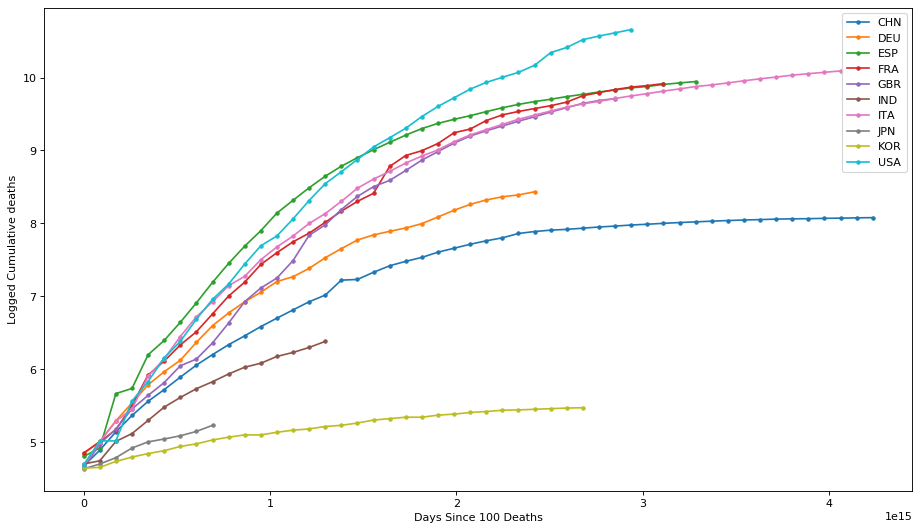

In [445]:
plt.figure(figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
for i in subset_countries:
    x = final_data2[final_data2['country_code'] == i]['days_since_100']
    y = final_data2[final_data2['country_code'] == i]['cum_deaths']
    plt.plot(x,np.log(y+1), marker='.')   

plt.xlabel("Days Since 100 Deaths")
plt.ylabel("Logged Cumulative deaths")
plt.legend(subset_countries);



# Can we fit a logistic model to the Italy data? 
## How well does this fit to other countries?
## What predictions can we get with this model??

Using the code created here as a guideline: https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

In [462]:
#Define the logistic regression function
def logistic():
    return c/(1 + np.exp(-(x - b)/a))

In [464]:
italy = cum_data[cum_data['country_code'] == 'ITA']
italy

,country_code,dateRep,cum_cases,cum_deaths
5880,ITA,2019-12-31,0,0
5881,ITA,2020-01-01,0,0
5882,ITA,2020-01-02,0,0
5883,ITA,2020-01-03,0,0
5884,ITA,2020-01-04,0,0
...,...,...,...,...
5988,ITA,2020-04-17,168941,22172
5989,ITA,2020-04-18,172434,22747
5990,ITA,2020-04-19,175925,23227
5991,ITA,2020-04-20,178972,23660


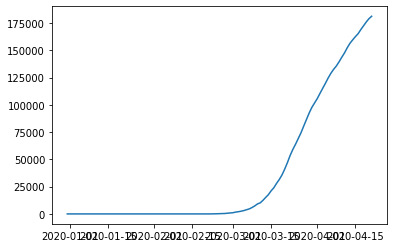

In [451]:
plt.plot(cum_data[cum_data['country_code'] == 'ITA']['dateRep'], cum_data[cum_data['country_code'] == 'ITA']['cum_cases'])